<a href="https://colab.research.google.com/github/spros1/HeartFailureAnalysis/blob/main/ExcerA_Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



1.   Start the commands in order to load a file from Kaggle to Colab

---


In [2]:
pip install -q kaggle

In [3]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sprospap","key":"9a4854805a9655a32d9fa00b6ca4aa15"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

  0% 0.00/3.97k [00:00<?, ?B/s]
100% 3.97k/3.97k [00:00<00:00, 1.78MB/s]


In [7]:
ls

heart-failure-clinical-data.zip  kaggle.json  sample_data/


In [8]:
! unzip heart-failure-clinical-data.zip

Archive:  heart-failure-clinical-data.zip
  inflating: heart_failure_clinical_records_dataset.csv  




2.   Check the data and import them to SqlDatabase

---




In [9]:
# Check dataset 
import pandas as pd
from google.colab import files
with open('heart_failure_clinical_records_dataset.csv', 'r') as data:
    df3 = pd.read_csv(data, encoding = ('ansi'))
    print (df3)

      age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]


### Create an instance of Database and load to table the CSV

In [10]:
# create the SQLite Database
%pip install csv-to-sqlite

In [11]:
# import to table 
!csv-to-sqlite -f heart_failure_clinical_records_dataset.csv -t full -o db.sqlite

Written 299 rows into 1 tables in 0.017 seconds


### Accessing Database - Copy data to dataframe


In [12]:
#Accessing the SQL Database
import sqlite3

In [13]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

In [14]:
conn = create_connection("db.sqlite")

In [15]:
import pandas as pd 

cur = conn.cursor()
cur.execute(f"SELECT * FROM heart_failure_clinical_records_dataset " )
df = pd.DataFrame(cur.fetchall(), columns= [ 'Age', 'Anaemia', 'Creatinine_Phosphokinase', 'Diabetes', 'Ejection_Fraction', 'High_Blood_Pressure', 'Platelets', 'Serum_creatinine', 'Serum_Sodium', 'Sex', 'Smoking', 'Time', 'Death_Event'] )

print(df)

      Age  Anaemia  Creatinine_Phosphokinase  ...  Smoking  Time  Death_Event
0    75.0        0                       582  ...        0     4            1
1    55.0        0                      7861  ...        0     6            1
2    65.0        0                       146  ...        1     7            1
3    50.0        1                       111  ...        0     7            1
4    65.0        1                       160  ...        0     8            1
..    ...      ...                       ...  ...      ...   ...          ...
294  62.0        0                        61  ...        1   270            0
295  55.0        0                      1820  ...        0   271            0
296  45.0        0                      2060  ...        0   278            0
297  45.0        0                      2413  ...        1   280            0
298  50.0        0                       196  ...        1   285            0

[299 rows x 13 columns]


We now have the data base in SQLite, and the dataframe df ready to use in python

### Start Data Analysis


In [16]:
df.head()

,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_creatinine,Serum_Sodium,Sex,Smoking,Time,Death_Event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       299 non-null    float64
 1   Anaemia                   299 non-null    int64  
 2   Creatinine_Phosphokinase  299 non-null    int64  
 3   Diabetes                  299 non-null    int64  
 4   Ejection_Fraction         299 non-null    int64  
 5   High_Blood_Pressure       299 non-null    int64  
 6   Platelets                 299 non-null    float64
 7   Serum_creatinine          299 non-null    float64
 8   Serum_Sodium              299 non-null    int64  
 9   Sex                       299 non-null    int64  
 10  Smoking                   299 non-null    int64  
 11  Time                      299 non-null    int64  
 12  Death_Event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [18]:
# search for missing values -- no missing values
df.isnull().sum()

Age                         0
Anaemia                     0
Creatinine_Phosphokinase    0
Diabetes                    0
Ejection_Fraction           0
High_Blood_Pressure         0
Platelets                   0
Serum_creatinine            0
Serum_Sodium                0
Sex                         0
Smoking                     0
Time                        0
Death_Event                 0
dtype: int64

In [22]:
# ckeck statistics
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
Anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
Creatinine_Phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
Diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
Ejection_Fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
High_Blood_Pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
Platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
Serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
Serum_Sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
Sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [23]:
# view total values order by age
df.sort_values(by='Age')

,Age,Anaemia,Creatinine_Phosphokinase,Diabetes,Ejection_Fraction,High_Blood_Pressure,Platelets,Serum_creatinine,Serum_Sodium,Sex,Smoking,Time,Death_Event
269,40.0,0,582,1,35,0,222000.00,1.00,132,1,0,244,0
232,40.0,1,129,0,35,0,255000.00,0.90,137,1,0,209,0
180,40.0,0,478,1,30,0,303000.00,0.90,136,1,0,148,0
242,40.0,0,90,0,35,0,255000.00,1.10,136,1,1,212,0
248,40.0,0,624,0,35,0,301000.00,1.00,142,1,1,214,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,90.0,1,60,1,50,0,226000.00,1.00,134,1,0,30,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1


In [24]:
import matplotlib as plt
import seaborn as sns

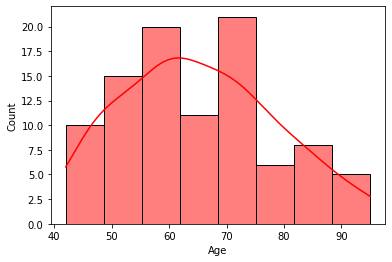

In [26]:
### relationship between age and deaths 
sns.histplot(df[df.Death_Event == 1].Age, kde=True, color="red")


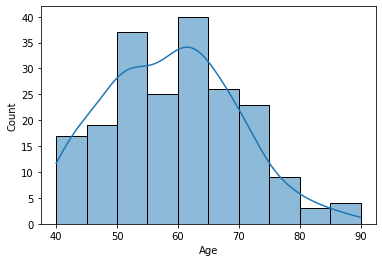

In [27]:
sns.histplot(df[df.Death_Event == 0].Age, kde=True)

###No problem found in dataset so we can proceed with the calculations



In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [59]:
# delete time feature to be the same with method in paper
df_without_time = df.drop(columns='Time')

# create 
x = df_without_time.drop(columns='Death_Event')
y = df_without_time['Death_Event']

In [60]:
# run random forest method
model = RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.1542802  0.02177304 0.13130754 0.0209682  0.16765995 0.02134483
 0.12504831 0.21018488 0.10699434 0.01993556 0.02050315]


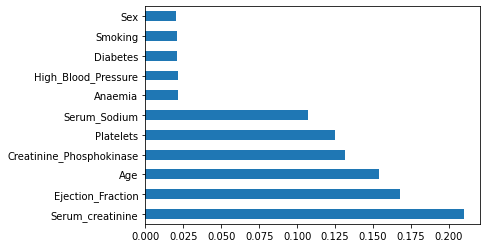

In [61]:
# results in visual
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

###Now lets create the accuracy score

In [67]:
# Now find accuracy 
inp_data = df_without_time.drop(columns='Death_Event')
out_data = df_without_time[['Death_Event']]

# split to 70 - 30 % as the paper
X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.3, random_state=0)

## Applying Transformer
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (209, 11)
X_test Shape  :  (90, 11)
y_train Shape :  (209, 1)
y_test Shape  :  (90, 1)


In [86]:
def result(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print('Accuracy Score: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print("\n",classification_report(y_pred, y_test))

In [87]:
def sample_result( n_estimators = 100, max_features ='auto', max_depth = None, min_samples_split=11 ):    
    
    scores = [] 
    for i in range(0,100): # 100 samples
        n_estimators, max_features, max_depth, min_samples_split
        X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.3)
        clf = RandomForestClassifier(n_estimators      = n_estimators,
                                     max_features      = max_features,
                                     max_depth         = max_depth,
                                     min_samples_split = min_samples_split) 
        sc      = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test  = sc.fit_transform(X_test)
        clf.fit(X_train, y_train)
        scores.append(accuracy_score(clf.predict(X_test), y_test)) 

    plt.hist(scores)
    plt.show()
    print("Best Score: {}\nMean Score: {}".format(np.max(scores), np.mean(scores)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Accuracy Score: 0.7444

               precision    recall  f1-score   support

           0       0.85      0.79      0.82        67
           1       0.50      0.61      0.55        23

    accuracy                           0.74        90
   macro avg       0.68      0.70      0.69        90
weighted avg       0.76      0.74      0.75        90



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y wa

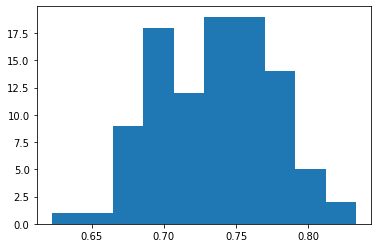

Best Score: 0.8333333333333334
Mean Score: 0.736


In [88]:
clf = RandomForestClassifier(random_state=0)
result(clf)
sample_result()